Données chargées avec succès.
Nombre total d'enregistrements pour vehA : 466
Nombre total d'enregistrements pour les véhicules B, C, D : 3024
Données préparées et filtrées pour l'intervalle 0-30s.
Nombre d'enregistrements pour vehA après filtrage : 298
Nombre d'enregistrements pour les véhicules B, C, D après filtrage : 714


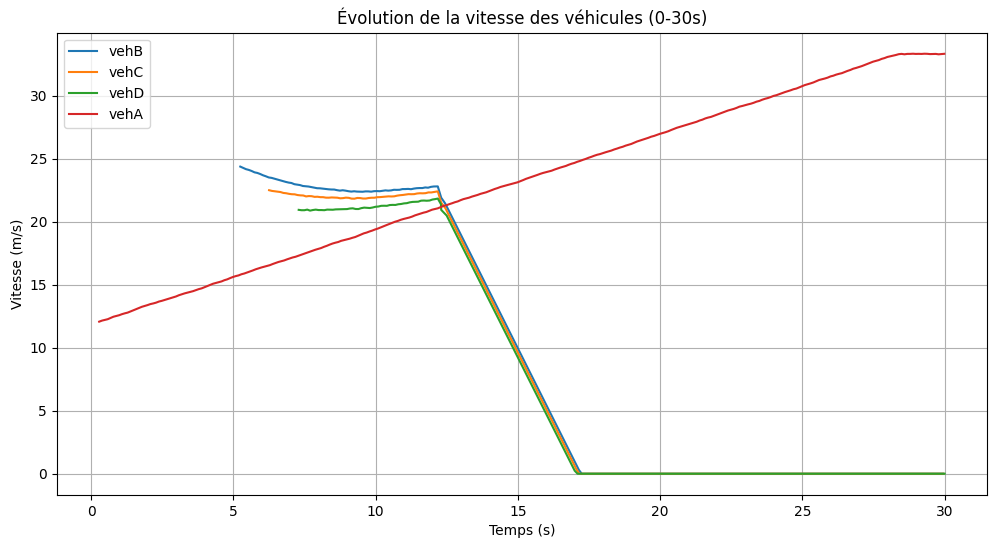

Graphique de l'évolution de la vitesse sauvegardé.


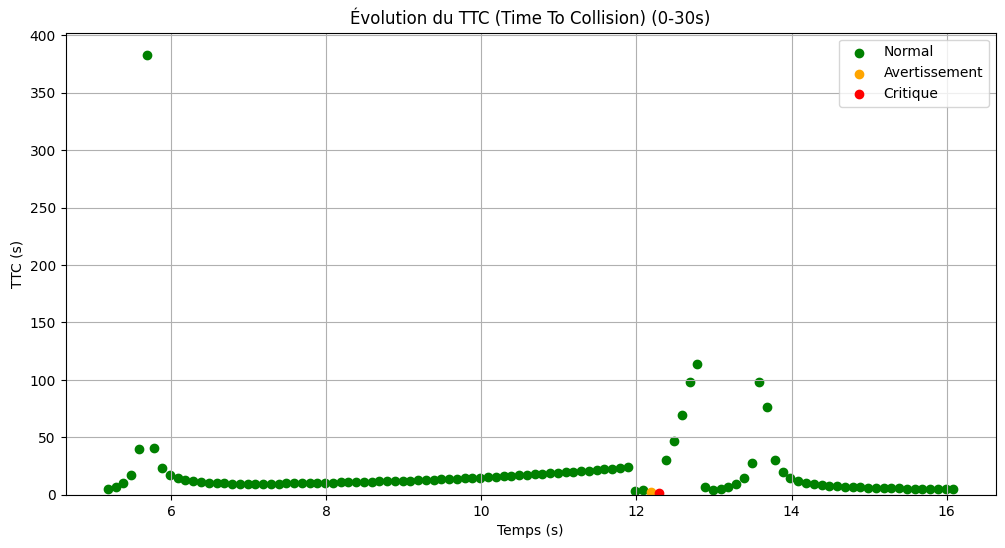

Graphique de l'évolution du TTC sauvegardé.
Nombre de points normaux : 296
Nombre d'avertissements : 1
Nombre de situations critiques : 1


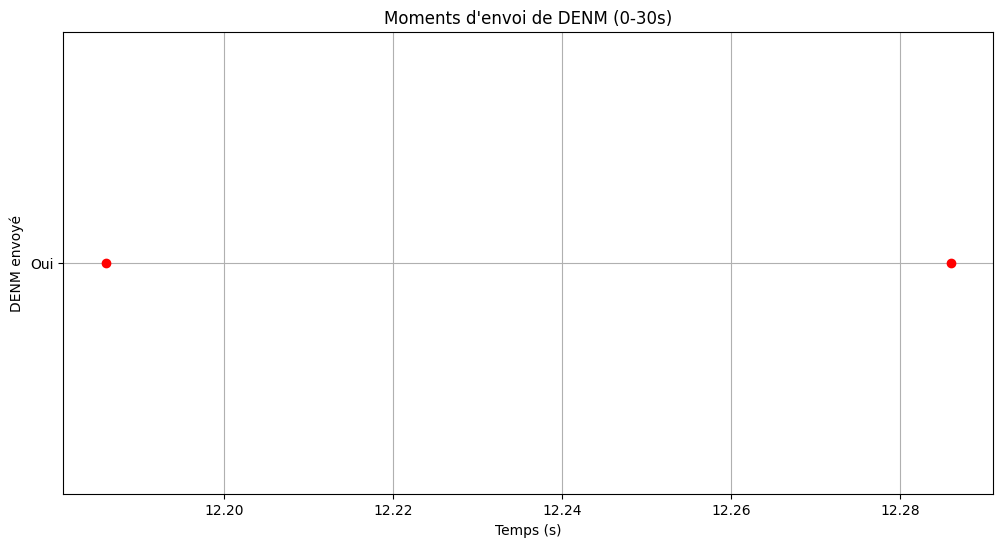

Graphique des moments d'envoi de DENM sauvegardé.
Nombre total de DENM envoyés : 2


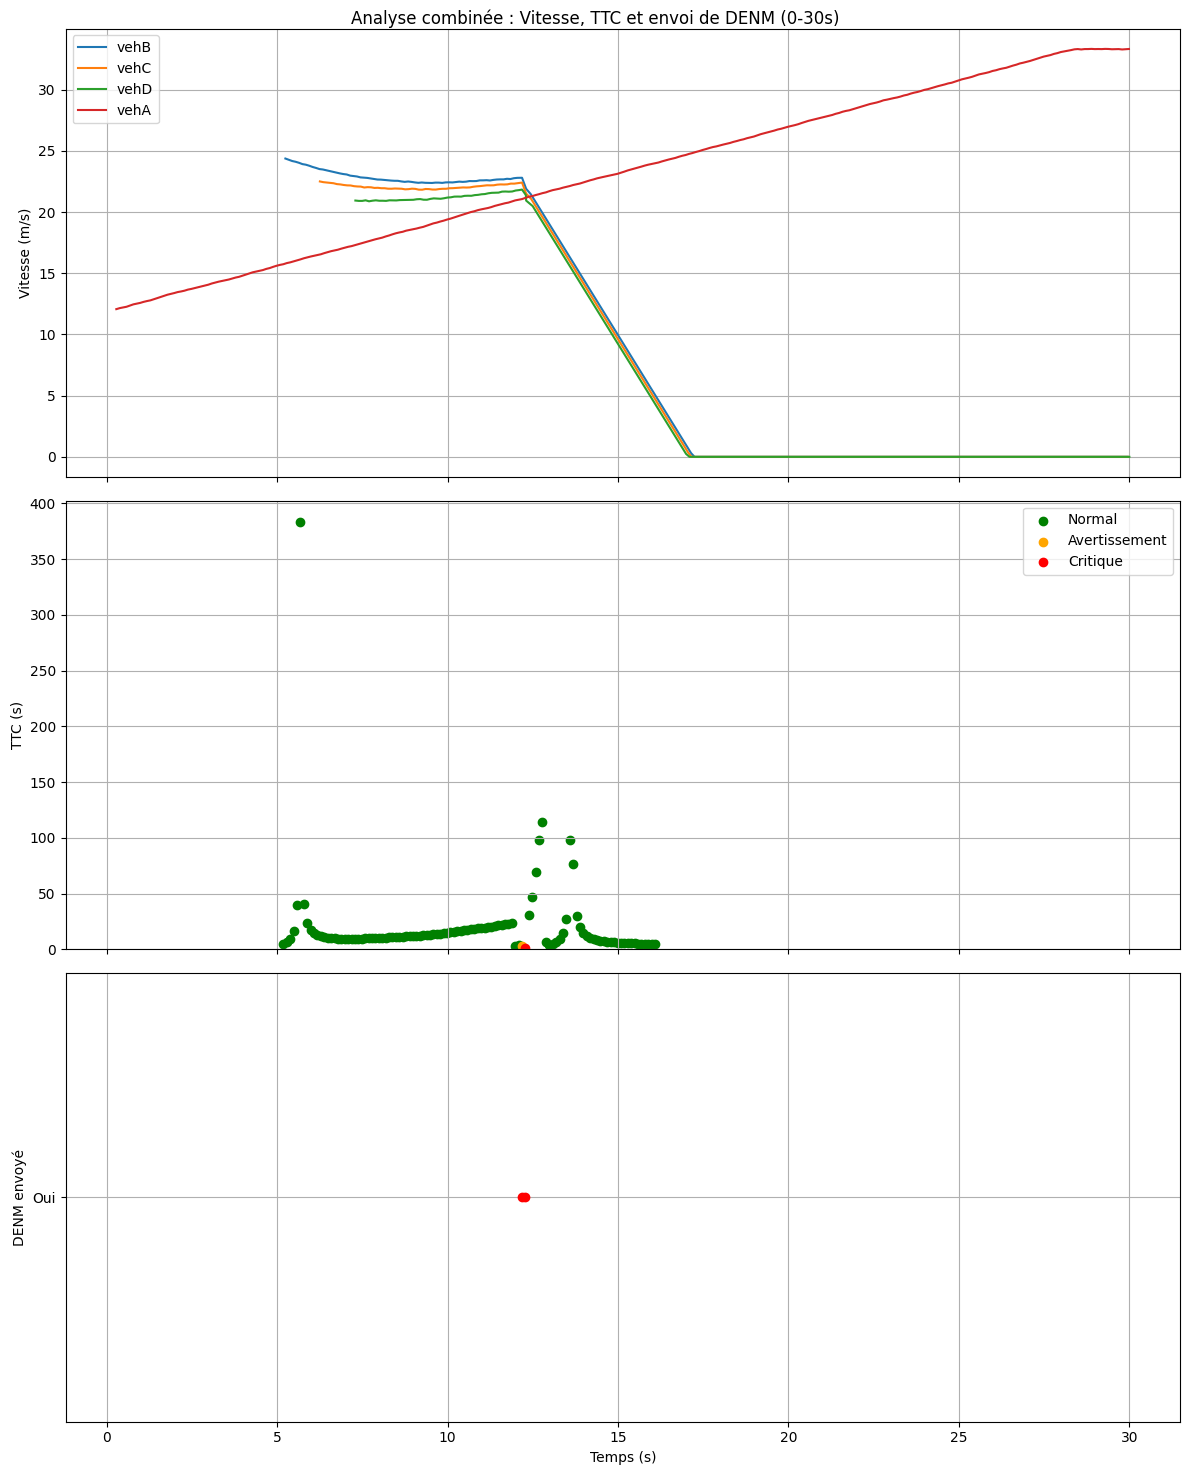

Graphique d'analyse combinée sauvegardé.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Création du répertoire pour sauvegarder les images
if not os.path.exists('./images'):
    os.makedirs('./images')

# Chargement des données
warning_data = pd.read_csv('collision_data_vehA.csv')
alert_data_B = pd.read_csv('collision_alert_vehB.csv')
alert_data_C = pd.read_csv('collision_alert_vehC.csv')
alert_data_D = pd.read_csv('collision_alert_vehD.csv')

# Fusionner les données des véhicules B, C et D
alert_data = pd.concat([alert_data_B, alert_data_C, alert_data_D])

print("Données chargées avec succès.")
print(f"Nombre total d'enregistrements pour vehA : {len(warning_data)}")
print(f"Nombre total d'enregistrements pour les véhicules B, C, D : {len(alert_data)}")

# Préparation des données
warning_data['Time'] = pd.to_numeric(warning_data['Time'])
alert_data['Time'] = pd.to_numeric(alert_data['Time'])

# Trier les données par temps
warning_data = warning_data.sort_values('Time')
alert_data = alert_data.sort_values('Time')

# Filtrer les données pour l'intervalle 0-30s
warning_data = warning_data[(warning_data['Time'] >= 0) & (warning_data['Time'] <= 30)]
alert_data = alert_data[(alert_data['Time'] >= 0) & (alert_data['Time'] <= 30)]

# Créer une colonne pour les moments d'envoi de DENM
warning_data['DENM_Sent'] = warning_data['SubCauseCode'].apply(lambda x: 1 if x in [1, 2] else 0)

print("Données préparées et filtrées pour l'intervalle 0-30s.")
print(f"Nombre d'enregistrements pour vehA après filtrage : {len(warning_data)}")
print(f"Nombre d'enregistrements pour les véhicules B, C, D après filtrage : {len(alert_data)}")

# Graphique de l'évolution de la vitesse des véhicules
plt.figure(figsize=(12, 6))
for vehicle in ['vehB', 'vehC', 'vehD']:
    vehicle_data = alert_data[alert_data['VehicleID'] == vehicle]
    plt.plot(vehicle_data['Time'], vehicle_data['Speed'], label=vehicle)

plt.plot(warning_data['Time'], warning_data['Speed'], label='vehA')

plt.title("Évolution de la vitesse des véhicules (0-30s)")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s)")
plt.legend()
plt.grid(True)
plt.savefig('./images/vitesse_vehicules.png')
plt.show()

print("Graphique de l'évolution de la vitesse sauvegardé.")

# Graphique de l'évolution du TTC
plt.figure(figsize=(12, 6))
warning_critical = warning_data[warning_data['SubCauseCode'] == 2]
warning_warning = warning_data[warning_data['SubCauseCode'] == 1]
warning_normal = warning_data[warning_data['SubCauseCode'] == 0]

plt.scatter(warning_normal['Time'], warning_normal['TTC'], c='green', label='Normal')
plt.scatter(warning_warning['Time'], warning_warning['TTC'], c='orange', label='Avertissement')
plt.scatter(warning_critical['Time'], warning_critical['TTC'], c='red', label='Critique')

plt.title("Évolution du TTC (Time To Collision) (0-30s)")
plt.xlabel("Temps (s)")
plt.ylabel("TTC (s)")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.savefig('./images/evolution_ttc.png')
plt.show()

print("Graphique de l'évolution du TTC sauvegardé.")
print(f"Nombre de points normaux : {len(warning_normal)}")
print(f"Nombre d'avertissements : {len(warning_warning)}")
print(f"Nombre de situations critiques : {len(warning_critical)}")

# Graphique des moments d'envoi de DENM
plt.figure(figsize=(12, 6))
denm_sent = warning_data[warning_data['DENM_Sent'] == 1]
plt.plot(denm_sent['Time'], denm_sent['DENM_Sent'], 'ro')
plt.title("Moments d'envoi de DENM (0-30s)")
plt.xlabel("Temps (s)")
plt.ylabel("DENM envoyé")
plt.yticks([1], ['Oui'])
plt.grid(True)
plt.savefig('./images/envoi_denm.png')
plt.show()

print("Graphique des moments d'envoi de DENM sauvegardé.")
print(f"Nombre total de DENM envoyés : {len(denm_sent)}")

# Analyse combinée
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Vitesse des véhicules
for vehicle in ['vehB', 'vehC', 'vehD']:
    vehicle_data = alert_data[alert_data['VehicleID'] == vehicle]
    ax1.plot(vehicle_data['Time'], vehicle_data['Speed'], label=vehicle)
ax1.plot(warning_data['Time'], warning_data['Speed'], label='vehA')
ax1.set_ylabel("Vitesse (m/s)")
ax1.legend()
ax1.grid(True)

# TTC
ax2.scatter(warning_normal['Time'], warning_normal['TTC'], c='green', label='Normal')
ax2.scatter(warning_warning['Time'], warning_warning['TTC'], c='orange', label='Avertissement')
ax2.scatter(warning_critical['Time'], warning_critical['TTC'], c='red', label='Critique')
ax2.set_ylabel("TTC (s)")
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid(True)

# Envoi de DENM
ax3.plot(denm_sent['Time'], denm_sent['DENM_Sent'], 'ro')
ax3.set_ylabel("DENM envoyé")
ax3.set_yticks([1])
ax3.set_yticklabels(['Oui'])
ax3.grid(True)

plt.xlabel("Temps (s)")
plt.suptitle("Analyse combinée : Vitesse, TTC et envoi de DENM (0-30s)")
plt.tight_layout()
plt.savefig('./images/analyse_combinee.png')
plt.show()

print("Graphique d'analyse combinée sauvegardé.")

In [21]:
# Cellule 2 : Préparation des données

# Convertir la colonne Time en secondes depuis le début de la simulation
warning_data['Time'] = (warning_data['Time'] - warning_data['Time'].min()).dt.total_seconds()
alert_data['Time'] = (alert_data['Time'] - alert_data['Time'].min()).dt.total_seconds()

# Trier les données par temps
warning_data = warning_data.sort_values('Time')
alert_data = alert_data.sort_values('Time')

# Filtrer les données pour l'intervalle 0-30s
warning_data = warning_data[(warning_data['Time'] >= 0) & (warning_data['Time'] <= 30)]
alert_data = alert_data[(alert_data['Time'] >= 0) & (alert_data['Time'] <= 30)]

# Créer une colonne pour les moments d'envoi de DENM
warning_data['DENM_Sent'] = warning_data['SubCauseCode'].apply(lambda x: 1 if x in [1, 2] else 0)

print("Données préparées et filtrées pour l'intervalle 0-30s.")
print(f"Nombre d'enregistrements pour vehA après filtrage : {len(warning_data)}")
print(f"Nombre d'enregistrements pour les véhicules B, C, D après filtrage : {len(alert_data)}")

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
plt.figure(figsize=(12, 6))
for vehicle in ['vehB', 'vehC', 'vehD']:
    vehicle_data = alert_data[alert_data['VehicleID'] == vehicle]
    plt.plot(vehicle_data['Time'], vehicle_data['Speed'], label=vehicle)

plt.plot(warning_data['Time'], warning_data['Speed'], label='vehA')

plt.title("Évolution de la vitesse des véhicules (0-30s)")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s)")
plt.legend()
plt.grid(True)
plt.savefig('./images/vitesse_vehicules.png')
plt.show()

print("Graphique de l'évolution de la vitesse sauvegardé.")

In [ ]:
plt.figure(figsize=(12, 6))
warning_critical = warning_data[warning_data['SubCauseCode'] == 2]
warning_warning = warning_data[warning_data['SubCauseCode'] == 1]
warning_normal = warning_data[warning_data['SubCauseCode'] == 0]

plt.scatter(warning_normal['Time'], warning_normal['TTC'], c='green', label='Normal')
plt.scatter(warning_warning['Time'], warning_warning['TTC'], c='orange', label='Avertissement')
plt.scatter(warning_critical['Time'], warning_critical['TTC'], c='red', label='Critique')

plt.title("Évolution du TTC (Time To Collision) (0-30s)")
plt.xlabel("Temps (s)")
plt.ylabel("TTC (s)")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.savefig('./images/evolution_ttc.png')
plt.show()

print("Graphique de l'évolution du TTC sauvegardé.")
print(f"Nombre de points normaux : {len(warning_normal)}")
print(f"Nombre d'avertissements : {len(warning_warning)}")
print(f"Nombre de situations critiques : {len(warning_critical)}")

In [ ]:
plt.figure(figsize=(12, 6))
denm_sent = warning_data[warning_data['DENM_Sent'] == 1]
plt.plot(denm_sent['Time'], denm_sent['DENM_Sent'], 'ro')
plt.title("Moments d'envoi de DENM (0-30s)")
plt.xlabel("Temps (s)")
plt.ylabel("DENM envoyé")
plt.yticks([1], ['Oui'])
plt.grid(True)
plt.savefig('./images/envoi_denm.png')
plt.show()

print("Graphique des moments d'envoi de DENM sauvegardé.")
print(f"Nombre total de DENM envoyés : {len(denm_sent)}")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Vitesse des véhicules
for vehicle in ['vehB', 'vehC', 'vehD']:
    vehicle_data = alert_data[alert_data['VehicleID'] == vehicle]
    ax1.plot(vehicle_data['Time'], vehicle_data['Speed'], label=vehicle)
ax1.plot(warning_data['Time'], warning_data['Speed'], label='vehA')
ax1.set_ylabel("Vitesse (m/s)")
ax1.legend()
ax1.grid(True)

# TTC
ax2.scatter(warning_normal['Time'], warning_normal['TTC'], c='green', label='Normal')
ax2.scatter(warning_warning['Time'], warning_warning['TTC'], c='orange', label='Avertissement')
ax2.scatter(warning_critical['Time'], warning_critical['TTC'], c='red', label='Critique')
ax2.set_ylabel("TTC (s)")
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid(True)

# Envoi de DENM
ax3.plot(denm_sent['Time'], denm_sent['DENM_Sent'], 'ro')
ax3.set_ylabel("DENM envoyé")
ax3.set_yticks([1])
ax3.set_yticklabels(['Oui'])
ax3.grid(True)

plt.xlabel("Temps (s)")
plt.suptitle("Analyse combinée : Vitesse, TTC et envoi de DENM (0-30s)")
plt.tight_layout()
plt.savefig('./images/analyse_combinee.png')
plt.show()

print("Graphique d'analyse combinée sauvegardé.")